# Master Thesis
## Twitter Network Data - Followers

Tasks in the script:
- process Follower lists of politicians
- remove bots
- create follower-follower intersection list
- create friend-follower intersection list
- estimate political ideology of followers

In [1]:
import pandas as pd
import json as json
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from math import log
import seaborn as sns
from statistics import mean
import random
from scipy.stats import powerlaw
import scipy
#from pyvis.network import Network
#import networkx as nx
import requests
from requests import get
import time
import csv
import gzip
import shutil
import os
from tqdm import tqdm
from scipy.optimize import curve_fit

In [2]:
# make list of document names to iterate through
# folder path
dir_path = r'Json_Data_Followers'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path[:-6])

In [3]:
print(len(res))

632


In [47]:
# Opening JSON file
#f = open(r'Twitter_authors_Thesis.json')
f = open(r'ABM_Files/pol_network_merged.csv') 
# returns JSON object as 
# a dictionary
data_authors = pd.read_json(f)
  
# Closing file
f.close()

In [52]:
data_authors = pd.read_csv(r'ABM_Files/pol_network_merged.csv', dtype = {"author_id_updated": str})

In [54]:
data_authors

,Unnamed: 0,Politician_ID,Follower_count,Friend_count,politician_followers,858,fol_friend_intersect,author_id_old,Party,nominate_dim1,author_id_updated,fol_fol_intersect,Tweet_Frequency_Day,Twitter_feed
0,0,586191770,3560,806.0,"[266133081, 253252536, 756285384, 24852012, 38...",586191770,"[{'author_id': 29501253, 'intersection': 43}, ...",586191770,Republican,0.684,586191770,"[{'author_id': 29501253, 'intersection': 544},...",3,NaN
1,1,29501253,3336833,876.0,"[23593446, 15764644, 266133081, 467823431, 156...",29501253,"[{'author_id': 586191770, 'intersection': 1}, ...",29501253,Democrat,-0.350,29501253,"[{'author_id': 586191770, 'intersection': 544}...",4,NaN
2,2,19926675,57346,891.0,"[23976316, 20467163, 518644221, 13218102, 2661...",19926675,"[{'author_id': 586191770, 'intersection': 16},...",19926675,Republican,0.520,19926675,"[{'author_id': 586191770, 'intersection': 516}...",12,NaN
3,3,38970940,238899,664.0,"[349296252, 234014087, 128664931, 97583689, 75...",38970940,"[{'author_id': 586191770, 'intersection': 1}, ...",38970940,Democrat,-0.227,38970940,"[{'author_id': 586191770, 'intersection': 152}...",5,NaN
4,4,23976316,23851,927.0,"[19926675, 20467163, 518644221, 13218102, 2661...",23976316,"[{'author_id': 586191770, 'intersection': 26},...",23976316,Republican,0.600,23976316,"[{'author_id': 586191770, 'intersection': 299}...",6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,854,1346205046036377601,5241,422.0,"[15764644, 467823431, 153486399, 950783972, 24...",1346205046036377601,"[{'author_id': 586191770, 'intersection': 0}, ...",1346205046036377600,Democrat,-0.311,1346205046036377601,"[{'author_id': 586191770, 'intersection': 61},...",2,NaN
855,855,1340783304304410625,28040,683.0,"[19926675, 20467163, 518644221, 13218102, 2540...",1340783304304410625,"[{'author_id': 586191770, 'intersection': 9}, ...",1340783304304410624,Republican,0.367,1340783304304410625,"[{'author_id': 586191770, 'intersection': 238}...",5,NaN
856,856,1187551973173796866,5782,124.0,"[15751083, 757862089, 756285384, 40282700, 215...",1187551973173796866,"[{'author_id': 586191770, 'intersection': 4}, ...",1187551973173796864,Republican,0.554,1187551973173796866,"[{'author_id': 586191770, 'intersection': 152}...",1,NaN
857,857,1128147829606600706,18232,836.0,"[38960144, 533324996, 391445643, 31013444, 231...",1128147829606600706,"[{'author_id': 586191770, 'intersection': 0}, ...",1128147829606600704,Democrat,-0.328,1128147829606600706,"[{'author_id': 586191770, 'intersection': 37},...",3,NaN


In [16]:
authors_lst = data_authors["author_id_strng"].tolist()

In [27]:
res_int = [int(item) for item in res]

In [18]:
print(res_int)

[21572, 581141, 1345807954604412, 23725, 305216, 1074129, 20546, 240760, 254082, 281540, 1080695666760929, 818472418620608, 237763, 1201953403099893, 1080584229510172, 76069, 50055, 113763, 229197, 733672650120253, 24745, 1135486, 239949, 1079770852302958, 1067541214671577, 914815520842616, 28602, 242926, 1052896620797460, 224285, 256157, 574799, 14140, 2847603, 38285, 40302, 1339931, 304138, 1072158357237174, 1080978331535896, 816719802328715, 16256, 4049197, 15764, 15745, 49217, 1122934522134315, 278094, 1344389506963808, 22044, 1340783304304410, 1021216905795899, 162069, 432895, 63650, 158470, 94154, 839226269627621, 38960, 915975047545749, 33576, 499268, 894940941039144, 1082311988926124, 169198, 156045, 1276403757224546, 950758571821629, 977247448820305, 817076257770835, 1345103905869455, 188019, 18632, 88806, 435331, 29766, 1191327658124165, 819744763020775, 936626346553413, 1090328229548827, 153507, 1080844, 218292, 283130, 34715, 826065164504006, 24852, 59536, 1081240074946253,

In [28]:
# only process follower lists of politicians in my politician network dataset

res_filtered = [item for item in res_int if item in authors_lst]

In [29]:
res_rest = []
for item in res_int:
    if item not in res_filtered:
        res_rest.append(item)

In [30]:
print(len(res_filtered))

818


In [31]:
print(res_filtered[0])

21572351


In [32]:
authors_notfound = []
for author in authors_lst:
    if author not in res_filtered:
           authors_notfound.append(author)

In [33]:
count = 0
for author in authors_notfound:
    author_str = str(author)
    short_author = int(author_str[:-4])
    for item in res_rest: 
        item_str = str(item)
        short_item = int(item_str[:-4])
        if short_author == short_item:
            res_filtered.append(item)
            count+=1
    #print("next author")
            
print(count)

135


In [16]:
dict_lst = []
no_gzip_lst = []
not_working_lst = []
for j in tqdm (range(len(res_filtered)), desc="Loading..."):

        
    try:
        with gzip.open(f'Json_Data_Followers/{res_filtered[j]}.jsonl', 'rb') as f_in:
            with open(f'Intermediate_Files/file{[j]}.txt', 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out) 
    
    # create empty dict for this politician to fill with data
        keyList = ["politician_id", "ids", "followers", "following"]
        dict_user = dict(zip(keyList, [None]*len(keyList)))
        tweets = []
        with open(f'Intermediate_Files/file{[j]}.txt') as f:
            for line in f:
                tweets.append(json.loads(line))
    
    # create empty dict for this politician to fill with data
       # keyList = ["politician_id", "ids"]
        #dict_user = dict(zip(keyList, [None]*len(keyList)))
          
            
        try:       
            id_lst = []
            followers_lst = []
            following_lst = []
            for lst in tweets:
                for i in range(len(lst["data"])):
                    user = lst["data"][i]
                    id_user = user["id"]
                    followers = user["public_metrics"]["followers_count"]
                    following = user["public_metrics"]["following_count"]
                    id_lst.append(id_user)
                    
                    followers_lst.append(followers)
                    following_lst.append(following)
    
               
    
            dict_user["politician_id"] = res_filtered[j]
            dict_user["ids"] = id_lst
            dict_user["followers"] = followers_lst
            dict_user["following"] = following_lst
            dict_lst.append(dict_user)
    
        except:
            not_working_lst.append(res_filtered[j])
            
    except:
        no_gzip_lst.append(res_filtered[j])

Loading...: 100%|██████████| 512/512 [2:12:32<00:00, 15.53s/it]   


In [ ]:
print(not_working_lst)

[155669457]


In [ ]:
print(len(dict_lst))

511


In [27]:
with gzip.open(f'Json_Data_Followers/{not_working_lst[60]}.jsonl.gz', 'rb') as f_in:
        with open(f'Intermediate_Files/file{[0]}.txt', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out) 
    
    # create empty dict for this politician to fill with data
  
tweets = []
with open(f'Intermediate_Files/file{[0]}.txt') as f:
    for line in f:
        tweets.append(json.loads(line))
            
print(tweets)
         

[{'errors': [{'value': '1080277407867773056', 'detail': 'Could not find user with id: [1080277407867773056].', 'title': 'Not Found Error', 'resource_type': 'user', 'parameter': 'id', 'resource_id': '1080277407867773056', 'type': 'https://api.twitter.com/2/problems/resource-not-found'}], '__twarc': {'url': 'https://api.twitter.com/2/users/1080277407867773056/followers?tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2Clang%2Cpublic_metrics%2Ctext%2Cpossibly_sensitive%2Creferenced_tweets%2Creply_settings%2Csource%2Cwithheld%2Cedit_controls&user.fields=created_at%2Cdescription%2Centities%2Cid%2Clocation%2Cname%2Cpinned_tweet_id%2Cprofile_image_url%2Cprotected%2Cpublic_metrics%2Curl%2Cusername%2Cverified%2Cwithheld&max_results=1000', 'version': '2.12.0', 'retrieved_at': '2023-04-27T12:11:50+00:00'}}]


In [92]:
print(result)

{'errors': [{'value': '867495243482058752', 'detail': 'Could not find user with id: [867495243482058752].', 'title': 'Not Found Error', 'resource_type': 'user', 'parameter': 'id', 'resource_id': '867495243482058752', 'type': 'https://api.twitter.com/2/problems/resource-not-found'}], '__twarc': {'url': 'https://api.twitter.com/2/users/867495243482058752/following?tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2Clang%2Cpublic_metrics%2Ctext%2Cpossibly_sensitive%2Creferenced_tweets%2Creply_settings%2Csource%2Cwithheld%2Cedit_controls&user.fields=created_at%2Cdescription%2Centities%2Cid%2Clocation%2Cname%2Cpinned_tweet_id%2Cprofile_image_url%2Cprotected%2Cpublic_metrics%2Curl%2Cusername%2Cverified%2Cwithheld&max_results=1000', 'version': '2.12.0', 'retrieved_at': '2023-04-21T19:40:14+00:00'}}


Missing friends information for 98 politicians.
Missing follower information for 93 politicians.

In [ ]:
with open(r'ExtractedData/Followers_ExtractedData_1_20230531.json', "w") as outfile:
    json.dump(dict_lst, outfile)

After extracting the follower and friends data of politicians, we now:
- match the politician ids in these datasets to our twitter author ids
- only keep those we can match
- get distribution of friends : followers and try to remove bots based on this

In [2]:
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
file_name = r'ExtractedData/Followers_ExtractedData_1_20230531.json'
 
# returns JSON object as 
# a dictionary
#secondpart_dict = json.load(f)
with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
    followers_1 = json.load(f)
# Closing file
f.close()

In [3]:
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
file_name = r'ExtractedData/Followers_ExtractedData_2_20230531.json'
 
# returns JSON object as 
# a dictionary
#secondpart_dict = json.load(f)
with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
    followers_2 = json.load(f)
# Closing file
f.close()

In [6]:
print(len(followers_1), len(followers_2))

511 348


In [4]:
followers = followers_1 + followers_2

In [8]:
print(len(followers))

859


In [9]:
pol_id_lst = []
for item in followers:
    pol_id_lst.append(item["politician_id"])
#print(my_data[0]["politician_id"])

In [15]:
print(type(pol_id_lst[0]))

<class 'int'>


In [17]:
print(type(authors_lst[0]))

<class 'int'>


In [20]:
matched_lst = [item for item in pol_id_lst if item in authors_lst]

In [21]:
print(len(matched_lst))

771


In [22]:
not_matched = []
for item in pol_id_lst:
    if item not in authors_lst:
        not_matched.append(item)

In [23]:
print(len(not_matched))

88


In [22]:
count = 0
for author in authors_lst:
    author_str = str(author)[:-3]
    #print(item_str)
    for item in not_matched:
        item_str = str(item)
        #print(author_str)
        if author_str in item_str:
            if author_str[-1] == "0":
                count+=1
            #print(author)
            #print(item_str)
            #print("next")
            
print(count)

13


In [26]:
failed_id = [155669457, 996094929733652480, 827279765287559168, 857009033882083328, 806583915012046848, 816652616625168384, 1343578440977494016, 816298918468259840, 1082311988926124032, 899978622416695296, 986423555025002496, 1221242033530195968, 991721030631780352, 855240223432769536, 882958562296819712, 964996994623311872, 817050219007328256, 872156132688711680, 722555010588872704, 1122934522134315008, 1080865917377097728, 1191327658124165120, 1082086081238102016, 818975124460335104, 930552552302792704, 894940941039144960, 936626346553413632, 963463966944059392, 816012124505931776, 1072134139560620032, 914815520842616832, 1345807954604412928, 950758571821629440, 935717078966964224, 818536152588238848, 854715071116849152, 1069636653353000960, 867495243482058752, 816181091673448448, 872148729184362496, 818507671284416512, 898787903609765888, 816111677917851648, 847098017274613760, 883069589722198016, 903354645623566336, 1081240074946253056, 1080573351914061952, 1080222360643485952, 1067748650485497984, 1067818539179024000, 1075830599007511040, 1083474782602125056, 1080898026418385024, 1090328229548827008, 1028854804087492992, 1075517806551154944, 1173978070535024896, 1176522535531360000, 1078771848882594048, 1080198683713506944, 1080277407867773056, 1080539438508401024, 1080584229510173056, 1080851152151953024, 1080894931311431936, 1074782372594413952, 1082334352711790976, 1017819745880542976, 1080569698536877952, 1061310112013435008, 1136060761422406016, 1029094268542098944, 1081350574589832960, 1082380458976050944, 1068273911224094976, 1124044084669287936, 1082329240681491968, 1298624375692893952, 1067541214671576960, 1075904377221721984, 1080191866509901952, 1080504024695222016, 1080574793630526976, 1080587263132733056, 1081312310059254016, 1148757025012276992, 1343656635907124992, 1346205046036378112, 1340783304304410880, 1187551973173797120, 1128147829606600960, 1345788865911655936]

In [24]:
authors_nofail = []
count = 0
for author in authors_lst:
    author_str = str(author)
    if author in failed_id:
        count+=1
    
    else:
        authors_nofail.append(author)
            
print(count)

46


In [25]:
print(len(not_matched))

88


In [27]:
print(len(authors_lst))

906


In [28]:
authors_tofix = []
for author in authors_nofail:
    if author in matched_lst:
        pass
    else:
        authors_tofix.append(author)

In [94]:
print(len(not_matched))

88


We have 906 authors. From our follower list, we can match 772 authors, thus 134 authors remain unmatched.
There are 46 authors whose follower data could not be found. Therefore, 88 authors should still be there to be matched, but with a slightly wrong ID, due to errors when the data was read in originally.

In [29]:
df_authors_fixed_id = pd.DataFrame()
author_old_lst = []
author_new_lst = []
count = 0
for author in authors_tofix:
    author_str = str(author)[:-3]
    author_str_long = str(author)
    #print(item_str)
    for item in not_matched:
        item_str = str(item)
        #print(author_str)
        if author_str in item_str:
           # if author_str_long[-1] == "0":
            author_old_lst.append(author)
            author_new_lst.append(item_str)
                
            count+=1
            #print(author)
            #print(item_str)
            #print("next")
df_authors_fixed_id["author_old"] = author_old_lst
df_authors_fixed_id["author_new"] = author_new_lst         
print(count)

88


In [30]:
df_authors_fixed_id
# merge this with my authors_df

,author_old,author_new
0,1081240074946252800,1081240074946252801
1,1274852794206388224,1274852794206388225
2,1080573351914061824,1080573351914061825
3,1080222360643485696,1080222360643485698
4,1067748650485497856,1067748650485497862
...,...,...
83,1346205046036377600,1346205046036377601
84,1340783304304410624,1340783304304410625
85,1187551973173796864,1187551973173796866
86,1128147829606600704,1128147829606600706


In [73]:
count = 0
for author in authors_cleaned:
    author_str = str(author)[:-3]
    author_str_long = str(author)
    #print(item_str)
    for item in not_matched:
        item_str = str(item)
        #print(author_str)
        if author_str in item_str:
           
            print(author)
            print(item_str)
            print("next")
            
print(count)

1274852794206388224
1274852794206388225
next
1080573351914061824
1080573351914061825
next
7334402
1080587263132733442
next
1080222360643485696
1080222360643485698
next
1067748650485497856
1067748650485497862
next
1067818539179024384
1067818539179024386
next
1075830599007510528
1075830599007510535
next
1083474782602125312
1083474782602125318
next
1080898026418384896
1080898026418384897
next
1090328229548826624
1090328229548826627
next
1028854804087492608
1028854804087492613
next
1075517806551154688
1075517806551154689
next
1176522535531360256
1176522535531360257
next
1078771848882593792
1078771848882593793
next
1080198683713507328
1080198683713507335
next
1080277407867772928
1080277407867772930
next
1080584229510172672
1080584229510172678
next
1080851152151953408
1080851152151953410
next
1074782372594413568
1074782372594413569
next
1082334352711790592
1082334352711790593
next
1017819745880543232
1017819745880543238
next
23725826
1074782372594413569
next
1136060761422405632
1136060761422

In [31]:
df_authors_fixed_id["author_id"] = df_authors_fixed_id["author_old"]

In [32]:
data_authors_new = data_authors.merge(df_authors_fixed_id, how='left', on='author_id')

In [33]:
pd.set_option('display.max_rows', 906)

In [34]:
data_authors_new.dtypes

author_id            int64
author.username     object
author.name         object
author_id_strng      int64
author_old         float64
author_new          object
dtype: object

In [35]:
data_authors_new['author_new'] = data_authors_new['author_new'].fillna(0)

In [36]:
count = 0
for i, row in data_authors_new.iterrows():
    if row["author_new"] == 0:
        count+=1
        data_authors_new.at[i,'author_new'] = data_authors_new.at[i,'author_id']
        
print(count)

818


In [37]:
data_authors_new["author_id_updated"] = data_authors_new["author_new"]

In [38]:
data_authors_new

,author_id,author.username,author.name,author_id_strng,author_old,author_new,author_id_updated
0,211530910,RepBillJohnson,Rep. Bill Johnson,211530910,NaN,211530910,211530910
1,81207735,JohnsonLeads,Bill Johnson,81207735,NaN,81207735,81207735
2,219429281,RepKinzinger,Adam Kinzinger,219429281,NaN,219429281,219429281
3,231510077,JoaquinCastrotx,Joaquin Castro,231510077,NaN,231510077,231510077
4,233693291,RepRickCrawford,Rep. Rick Crawford,233693291,NaN,233693291,233693291
5,233949261,RepHuizenga,Rep. Bill Huizenga,233949261,NaN,233949261,233949261
6,234057152,RepMGriffith,Morgan Griffith,234057152,NaN,234057152,234057152
7,130714799,MorganGriffith,Morgan Griffith,130714799,NaN,130714799,130714799
8,234797704,AustinScottGA08,Rep. Austin Scott,234797704,NaN,234797704,234797704
9,235312723,DesJarlaisTN04,Scott DesJarlais,235312723,NaN,235312723,235312723


In [39]:
data_authors_new.to_json("Twitter_authors_Thesis_Updated.json")

In [41]:
authors_lst_new = data_authors_new["author_id_updated"].tolist()

In [45]:
authors_lst_new_int = [int(author) for author in authors_lst_new]

In [47]:
matched_lst_new = [item for item in pol_id_lst if item in authors_lst_new_int]

In [49]:
print(len(matched_lst_new))

860


In [50]:
print(len(pol_id_lst))

860


After updating the author IDs, we can indeed match all politician IDs from our follower dataset.
We now have to do the same process with the friends list.

In [90]:
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
file_name = r'ExtractedData/Friends_ExtractedData_20230602.json'
 
# returns JSON object as 
# a dictionary
#secondpart_dict = json.load(f)
with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
    friends = json.load(f)
# Closing file
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'ExtractedData/Friends_ExtractedData_20230602.json'

In [53]:
pol_id_lst = []
for item in followers:
    pol_id_lst.append(item["politician_id"])

In [54]:
print(len(pol_id_lst))

860


In [55]:
matched_lst_new = [item for item in pol_id_lst if item in authors_lst_new_int]

In [56]:
print(len(matched_lst_new))

860


In [35]:
data_authors_new

,author_id,author.username,author.name,author_id_strng,author_old,author_new,author_id_updated
0,211530910,RepBillJohnson,Rep. Bill Johnson,211530910,NaN,211530910,211530910
1,81207735,JohnsonLeads,Bill Johnson,81207735,NaN,81207735,81207735
2,219429281,RepKinzinger,Adam Kinzinger,219429281,NaN,219429281,219429281
3,231510077,JoaquinCastrotx,Joaquin Castro,231510077,NaN,231510077,231510077
4,233693291,RepRickCrawford,Rep. Rick Crawford,233693291,NaN,233693291,233693291
...,...,...,...,...,...,...,...
901,163570705,repcleaver,Rep. Emanuel Cleaver,163570705,NaN,163570705,163570705
902,168502762,RepEBJ,Rep. Eddie Bernice Johnson,168502762,NaN,168502762,168502762
903,188403766,Foster4Congress,Bill Foster,188403766,NaN,188403766,188403766
904,193732179,RepJudyChu,Judy Chu,193732179,NaN,193732179,193732179


In [11]:
# Opening JSON file
f = open(r'ExtractedData/Twitter_authors_Thesis_Updated.json')
  
# returns JSON object as 
# a dictionary
data_authors_new = pd.read_json(f, dtype={"author_id_updated":str})
  
# Closing file
f.close()

In [36]:
# check which politicians could not be retraced
count = 0
for i, row in data_authors_new.iterrows():
    if row["author_id_updated"] in failed_id:
        print(row["author_id"])
        print(row["author.username"])
        print("next")
print(count)

816298918468259840
RepRoKhanna
next
722555010588872704
RonEstesKS
next
854715071116849152
RepRonEstes
next
855240223432769536
ConorLambPA
next
818507671284416512
Denver4VA
next
847098017274613760
HoulahanForPa
next
903354645623566336
Meuser4Congress
next
883069589722198016
PeteStauber
next
1069636653353000960
RepSusanWild
next
1072134139560620032
RepMikeLevin
next
986423555025002496
BryanSteil
next
872156132688711680
LaurenUnderwood
next
1080865917377097728
RepCindyAxne
next
930552552302792704
DanCrenshawTX
next
806583915012046848
RepDrewFerguson
next
818536152588238848
RepGonzalez
next
872148729184362496
DrPaulGosar
next
817050219007328256
RepLBR
next
816111677917851648
RepRooney
next
827279765287559168
RepMikeJohnson
next
964996994623311872
Armstrong_ND
next
950758571821629440
DanLipinski
next
816012124505931776
RepDavidKustoff
next
816181091673448448
RepMcEachin
next
894940941039144960
JohnRoseforTN
next
857009033882083328
Lizzie4Congress
next
882958562296819712
SpanbergerVA07
next


We are also able to match all 860 politician IDs from the friends dataset to our authors in the main dataset.

The next steps are to record 
- friends:follower ratio, get distribution, filter bots out
- for each politician, which other politician they follow
- for each politician, get their rate of overlap from their friends with of the other politicians' followers. So, I want a fraction here for each politician for 859 other politicians
- record number of followers and friends for each politician
- get rate of overlap of followers between every pair of politicians

# Bot Analysis

Tasks to do:

* make list of politicians' followers
* remove politicians from this list
* remove duplicates
* compute ratio of friends:followers, log-transform
* plot and see if clear cut-off exists
* compare the friends:followers ratio with those of politicians' friends



Task 1: Get number of followers and number of friends per politician's followers

In [12]:
user_ids_lst = []
follower_lst = []
friends_lst = []
for item in followers:
    user_ids_lst.append(item["ids"])
    follower_lst.append(item["followers"])
    friends_lst.append(item["following"])

In [13]:
flat_list_followers = [item for sublist in follower_lst for item in sublist]
flat_list_friends = [item for sublist in friends_lst for item in sublist]
flat_list_ids= [item for sublist in user_ids_lst for item in sublist]

Task 2: Remove Politicians from this list

In [14]:
politician_ids = data_authors_new.author_id_updated.values.tolist()

In [15]:
flat_list_followers_nopol = []
flat_list_friends_nopol = []
flat_list_ids_nopol = []

for pol_id, followers, friends in zip(flat_list_ids,flat_list_followers,flat_list_friends ):
    if pol_id in politician_ids:
        pass
    else:
        flat_list_ids_nopol.append(pol_id)
        flat_list_followers_nopol.append(followers)
        flat_list_friends_nopol.append(friends)

In [16]:
print(len(flat_list_followers), len(flat_list_followers_nopol))

198725819 198632068


In [17]:
users_followers_friends_nopol = pd.DataFrame()
users_followers_friends_nopol["ID"] = flat_list_ids_nopol
users_followers_friends_nopol["Follower_count"] = flat_list_followers_nopol
users_followers_friends_nopol["Friend_count"] = flat_list_friends_nopol

In [24]:
users_followers_friends_nopol.dtypes

ID                object
Follower_count     int64
Friend_count       int64
dtype: object

In [20]:
users_followers_friends_nopol.to_json("ExtractedData/users_followers_friends_nopol.json")

Task 3: Remove duplicates

In [30]:
# drop duplicates based on ID column
ids_users_clean = users_followers_friends_nopol.drop_duplicates(subset=['ID'])

In [6]:
ids_users_clean

,ID,Follower_count,Friend_count
0,3247847943,77,1491
1,1282681287510114304,557,1103
2,1597709422381383680,76,70
3,1443384360355258368,905,4076
4,1644540758291251200,18,703
...,...,...,...
198631871,1029852842,309,627
198631924,21035730,3706,794
198632012,419057411,109,650
198632020,1346968060469526528,1,11


In [33]:
ids_users_clean.to_json("ExtractedData/users_followers_friends_nopol_nodup.json")

In [2]:
ids_users_clean = pd.read_json("ExtractedData/users_followers_friends_nopol_nodup.json")

Task 4: Compute follower:friend ratios

In [3]:
ids_users_clean_lst = ids_users_clean.ID.values.tolist()
followers_users_clean_lst = ids_users_clean.Follower_count.values.tolist()
friends_users_clean_lst = ids_users_clean.Friend_count.values.tolist()

In [4]:
# avoid division by zero
for i in range(len(followers_users_clean_lst)):
    if followers_users_clean_lst[i] == 0:
        followers_users_clean_lst[i] = 0.1

In [5]:
for i in range(len(friends_users_clean_lst)):
    if friends_users_clean_lst[i] == 0:
        friends_users_clean_lst[i] = 0.1

In [6]:
friend_follower_ratio = []

for followers, friends in zip(followers_users_clean_lst, friends_users_clean_lst):
    
    ratio = friends/followers
    friend_follower_ratio.append(ratio)

In [7]:
print(len(friend_follower_ratio))

55695673


In [8]:
# log-transform ratio
friend_follower_ratio_log = list(np.log(friend_follower_ratio))

In [9]:
print(friend_follower_ratio_log[:5])

[2.9633968929110543, 0.6832237793262184, -0.08223809823697212, 1.5049364506426892, 3.6649851339145]


In [10]:
# take random sample because list is too large to plot
sample_ratios = random.sample(friend_follower_ratio_log, 1000000)

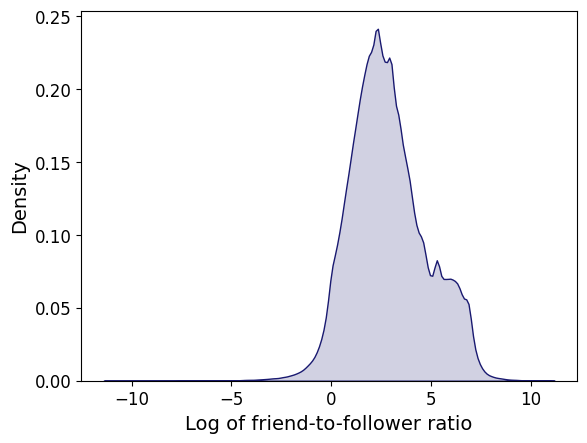

In [11]:
#plt.hist(sample_ratios, bins = 150)
import seaborn as sns
sns.kdeplot(sample_ratios, fill=True, color = "midnightblue", alpha=0.2)
# Set x-axis label with increased font size
plt.xlabel('Log of friend-to-follower ratio', fontsize=14)

# Set y-axis label with increased font size
plt.ylabel('Density', fontsize=14)

# Set tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('ABM_Files/Figures/FriendFollowerRatio_kde.svg', format='svg')
# Display the plot
plt.show()


In [16]:
# make cut off at log friend:follower ratio of 5
ids_users_clean["friend_follower_ratio_log"] = friend_follower_ratio_log

In [17]:
ids_users_clean["bots"] = ids_users_clean["friend_follower_ratio_log"] >= 5

In [36]:
# create log of follower and friend counts
ids_users_clean["Follower_count_incr"] = ids_users_clean["Follower_count"]+1
ids_users_clean["Friend_count_incr"] = ids_users_clean["Friend_count"]+1

In [37]:
ids_users_clean["Follower_count_log"] = np.log(ids_users_clean["Follower_count_incr"])
ids_users_clean["Friend_count_log"] = np.log(ids_users_clean["Friend_count_incr"])

/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Follower_count_log', ylabel='Friend_count_log'>

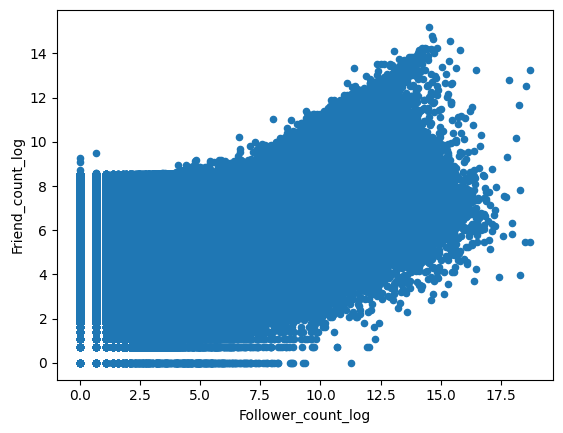

In [34]:
ids_users_clean2.plot.scatter(x = "Follower_count_log", y="Friend_count_log")

In [45]:
ids_users_clean_bot = ids_users_clean.loc[ids_users_clean.bots]
ids_users_clean_nobot = ids_users_clean.loc[ids_users_clean.bots==False]

<Axes: xlabel='Friend_count_log', ylabel='Follower_count_log'>

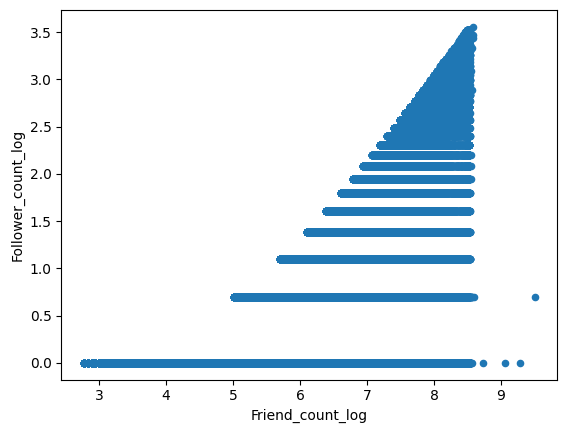

In [51]:
# scatter bots
ids_users_clean_bot.plot.scatter(x = "Friend_count_log", y="Follower_count_log")

<Axes: xlabel='Follower_count_log', ylabel='Friend_count_log'>

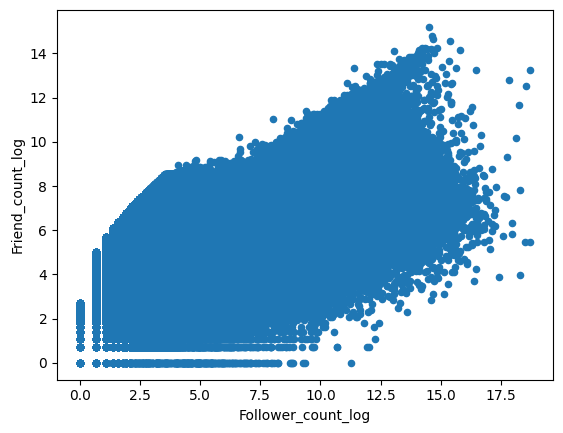

In [50]:
# scatter bots
ids_users_clean_nobot.plot.scatter(x = "Follower_count_log", y="Friend_count_log")

<Axes: ylabel='Frequency'>

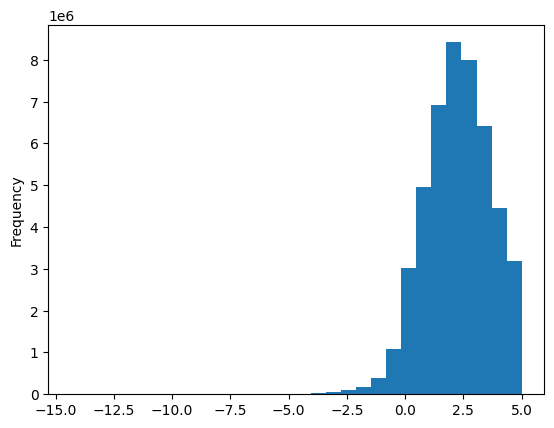

In [57]:
# plot histogram of both samples separately
ids_users_clean_nobot["friend_follower_ratio_log"].plot.hist( bins = 30)

In [70]:
bots_ids = ids_users_clean_bot.ID.values.tolist()
bots_ids = [str(item) for item in bots_ids]

In [72]:
print(len(bots_ids))

8479973


In [76]:

i = 0
for politician in followers:
    follower_lst = politician["ids"]
    nobot_followers = list(set(follower_lst) - set(bots_ids))
    followers[i]["ids_nobots"] = nobot_followers
    i+=1

In [77]:
with open('Followers_Extracted_data_20230612_NoBots.json', 'w') as fout:
    json.dump(followers, fout)

In [53]:
# do the same analysis with friends of politicians
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
file_name = r'ExtractedData/Friends_ExtracedData_20230602.json'
 
# returns JSON object as 
# a dictionary
#secondpart_dict = json.load(f)
with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
    friends = json.load(f)
# Closing file
f.close()

In [54]:
user_ids_lst_2 = []
follower_lst_2 = []
friends_lst_2 = []
for item in friends:
    user_ids_lst_2.append(item["ids"])
    follower_lst_2.append(item["followers"])
    friends_lst_2.append(item["following"])

In [55]:
flat_list_followers_2 = [item for sublist in follower_lst_2 for item in sublist]
flat_list_friends_2 = [item for sublist in friends_lst_2 for item in sublist]
flat_list_ids_2 = [item for sublist in user_ids_lst_2 for item in sublist]

In [57]:
# remove politicians
flat_list_followers_nopol_2 = []
flat_list_friends_nopol_2 = []
flat_list_ids_nopol_2 = []

for pol_id, followers, friends in zip(flat_list_ids_2, flat_list_followers_2,flat_list_friends_2 ):
    if pol_id in politician_ids:
        pass
    else:
        flat_list_ids_nopol_2.append(pol_id)
        flat_list_followers_nopol_2.append(followers)
        flat_list_friends_nopol_2.append(friends)

In [58]:
print(len(flat_list_followers_2), len(flat_list_followers_nopol_2))

386848 337708


In [59]:
users_followers_friends_nopol_2 = pd.DataFrame()
users_followers_friends_nopol_2["ID"] = flat_list_ids_nopol_2
users_followers_friends_nopol_2["Follower_count"] = flat_list_followers_nopol_2
users_followers_friends_nopol_2["Friend_count"] = flat_list_friends_nopol_2

In [60]:
users_followers_friends_nopol_2.dtypes

ID                object
Follower_count     int64
Friend_count       int64
dtype: object

In [61]:
users_followers_friends_nopol_2.to_json("ExtractedData/users_followers_friends_nopol_FRIENDS.json")

In [62]:
# drop duplicates based on ID column
ids_users_clean_2 = users_followers_friends_nopol_2.drop_duplicates(subset=['ID'])

In [63]:
ids_users_clean_2

,ID,Follower_count,Friend_count
0,67418441,10191043,108
1,15220473,3861615,199
2,48022448,2651,325
3,19402723,17632,5152
4,24169451,21599,2219
...,...,...,...
337674,17076353,12862,516
337675,36498374,2923,294
337677,3098356946,1427,421
337698,135967111,2591,427


In [64]:
ids_users_clean_2.to_json("ExtractedData/users_followers_friends_nopol_nodup_FRIENDS.json")

In [68]:
# compute follower:friend ratio
ids_users_clean_lst_2 = ids_users_clean_2.ID.values.tolist()
followers_users_clean_lst_2 = ids_users_clean_2.Follower_count.values.tolist()
friends_users_clean_lst_2 = ids_users_clean_2.Friend_count.values.tolist()

In [69]:
# avoid division by zero
for i in range(len(followers_users_clean_lst_2)):
    if followers_users_clean_lst_2[i] == 0:
        followers_users_clean_lst_2[i] = 0.1

In [70]:
for i in range(len(friends_users_clean_lst_2)):
    if friends_users_clean_lst_2[i] == 0:
        friends_users_clean_lst_2[i] = 0.1

In [71]:
friend_follower_ratio_2 = []

for followers, friends in zip(followers_users_clean_lst_2, friends_users_clean_lst_2):
    
    ratio = friends/followers
    friend_follower_ratio_2.append(ratio)

In [138]:
print(len(friend_follower_ratio_2))

154801


In [73]:
# log-transform ratio
friend_follower_ratio_log_2 = list(np.log(friend_follower_ratio_2))

In [74]:
# take random sample because list is too large to plot
sample_ratios_2 = random.sample(friend_follower_ratio_log_2, 100000)

(array([1.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00, 1.4000e+01,
        8.0000e+00, 1.6000e+01, 2.5000e+01, 4.8000e+01, 6.7000e+01,
        1.2400e+02, 2.4700e+02, 4.2000e+02, 6.3100e+02, 8.9400e+02,
        1.0830e+03, 1.5080e+03, 2.1090e+03, 3.0460e+03, 4.7720e+03,
        7.2220e+03, 1.1024e+04, 1.6105e+04, 2.4188e+04, 1.7052e+04,
        7.0280e+03, 1.9030e+03, 3.9300e+02, 5.4000e+01, 1.2000e+01]),
 array([-20.64627034, -19.77461809, -18.90296585, -18.03131361,
        -17.15966137, -16.28800912, -15.41635688, -14.54470464,
        -13.67305239, -12.80140015, -11.92974791, -11.05809567,
        -10.18644342,  -9.31479118,  -8.44313894,  -7.57148669,
         -6.69983445,  -5.82818221,  -4.95652997,  -4.08487772,
         -3.21322548,  -2.34157324,  -1.469921  ,  -0.59826875,
          0.27338349,   1.14503573,   2.01668798,   2.88834022,
          3.75999246,   4.6316447 ,   5.50329695]),
 <BarContainer object of 30 artists>)

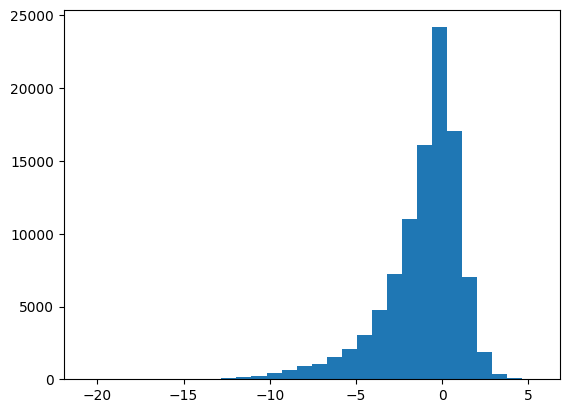

In [75]:
plt.hist(sample_ratios_2, bins = 30)

Task 2: Record follower links between politicians

In [25]:
followers = followers_1 + followers_2

In [26]:
# get follower ids
follower_id_lst = []
for item in followers:
    follower_id_lst.append(item["ids"])

In [30]:
# change id type to int
def change_type(sub):
    if isinstance(sub, list):
        return [change_type(ele) for ele in sub]
    elif isinstance(sub, tuple):
        return tuple(change_type(ele) for ele in sub)
    else:
        return int(sub)


In [31]:
follower_id_int_lst = change_type(follower_id_lst)

In [38]:
politician_followers = []

for politician, follower_sublist in zip(pol_id_lst, follower_id_int_lst):
    help_lst = []
    for politician_2 in pol_id_lst:
        if politician_2 in follower_sublist:
            help_lst.append(politician_2)
    politician_followers.append(help_lst)

In [47]:
print(type(pol_id_lst[0]))

<class 'int'>


In [49]:
for item in politician_followers:
    if len(item) > 0:
        print(len(item))

17
292
220
31
151
31
13
200
176
405
190
33
248
149
173
280
17
56
19
34
38
183
76
26
212
152
20
59
201
192
147
146
13
208
53
90
175
255
205
42
160
137
260
8
61
150
210
76
52
31
16
119
184
23
197
29
36
146
137
173
26
216
234
143
146
25
33
47
29
134
196
148
294
52
153
209
149
29
30
158
172
84
193
124
177
6
202
25
140
16
28
198
192
82
14
37
25
173
188
149
8
17
220
210
13
27
50
16
55
20
234
64
130
54
200
48
218
13
21
3
246
22
139
12
31
114
9
17
219
13
60
221
98
51
96
52
34
69
14
211
126
43
172
278
149
205
23
52
154
148
210
55
25
190
72
187
13
164
116
93
34
180
91
141
220
37
29
152
88
223
167
52
204
23
87
133
25
190
26
185
5
25
42
199
67
49
52
155
27
13
50
175
114
154
166
31
14
21
221
183
21
107
118
174
11
153
13
26
8
207
299
172
144
278
158
33
100
196
10
159
207
183
12
73
16
160
177
228
166
13
24
109
142
203
12
134
254
117
68
168
176
164
10
193
15
10
170
209
75
67
150
17
382
148
221
181
3
14
12
153
184
28
34
6
193
167
70
209
15
151
56
101
70
205
39
144
18
60
116
172
27
137
126
40
34
188
112

Now for each politician, we have a list of twitter IDs of politicians following them.

In [50]:
keys = ["author_id", "politician_followers"]
politicians_following_eachother = dict(zip(keys, [None]*len(keys)))
politicians_following_eachother["author_id"] = pol_id_lst
politicians_following_eachother["politician_followers"] = politician_followers

In [53]:
print(len(politician_followers))

859


In [55]:
# save dict as JSON

with open('Politicians_polfollower_lists.json', 'w') as fp:
    json.dump(politicians_following_eachother, fp)

Task 3: Get overlap between each pair of politicians' friends and followers

In [58]:
print(len(friends))

855


In [60]:
print(len(followers))

859


In [66]:
lst1 = [1,2,3,4]
lst2 = [1,4,5,6]
len(set(lst1).intersection(lst2))

2

In [73]:
pol_friends_followers_intersection = []

for politician in friends:
    help_lst = []
    pol_id = politician["politician_id"]
    pol_friends = politician["ids"]
    for politician_2 in followers:
        if politician_2["politician_id"] != pol_id:
            keys = ["author_id", "intersection"]
            pol_intersection_dict = dict(zip(keys, [None]*len(keys)))
            pol_intersection_dict["author_id"] = politician_2["politician_id"]
            pol2_followers = politician_2["ids"]
            intersection = len(set(pol_friends).intersection(pol2_followers))
            pol_intersection_dict["intersection"] = intersection
            help_lst.append(pol_intersection_dict)
    pol_friends_followers_intersection.append(help_lst)

In [74]:
print(len(pol_friends_followers_intersection))

855


In [77]:
with open('pol_friends_followers_intersection.json', 'w') as fout:
    json.dump(pol_friends_followers_intersection, fout)

Task 3: Add number of friends of each politician

In [2]:
# Opening JSON file
f = open(r'ExtractedData/Twitter_authors_Thesis_Updated.json')
  
# returns JSON object as 
# a dictionary
data_authors_new = pd.read_json(f, dtype={"author_id_updated":str})
  
# Closing file
f.close()

In [80]:
print(len(friends))

855


In [86]:
pol_friends_lst = []
pol_friends_ids = []
for pol in friends:
    pol_friends_lst.append(len(pol["ids"]))
    pol_friends_ids.append(pol["politician_id"])

In [92]:
pol_friends_df = pd.DataFrame()
pol_friends_df["author_id_updated"] = pol_friends_ids
pol_friends_df["friends_count"] = pol_friends_lst

In [116]:
df_follower_count["author_id_updated"] = df_follower_count["author_id_updated"].astype('string')

In [123]:
pol_friends_df["author_id_updated"] = pol_friends_df["author_id_updated"].astype('string')

In [119]:
data_authors_followers = data_authors_new.merge(df_follower_count, how='left', on='author_id_updated')


In [120]:
data_authors_followers

,author_id,author.username,author.name,author_id_strng,author_old,author_new,author_id_updated,follower_count_new,follower_count_cleaned_new
0,211530910,RepBillJohnson,Rep. Bill Johnson,211530910,NaN,211530910,211530910,44069.0,42652.0
1,81207735,JohnsonLeads,Bill Johnson,81207735,NaN,81207735,81207735,4464.0,4370.0
2,219429281,RepKinzinger,Adam Kinzinger,219429281,NaN,219429281,219429281,565325.0,533544.0
3,231510077,JoaquinCastrotx,Joaquin Castro,231510077,NaN,231510077,231510077,275297.0,265015.0
4,233693291,RepRickCrawford,Rep. Rick Crawford,233693291,NaN,233693291,233693291,27366.0,26354.0
5,233949261,RepHuizenga,Rep. Bill Huizenga,233949261,NaN,233949261,233949261,31534.0,30458.0
6,234057152,RepMGriffith,Morgan Griffith,234057152,NaN,234057152,234057152,32938.0,31959.0
7,130714799,MorganGriffith,Morgan Griffith,130714799,NaN,130714799,130714799,2672.0,2613.0
8,234797704,AustinScottGA08,Rep. Austin Scott,234797704,NaN,234797704,234797704,29390.0,28343.0
9,235312723,DesJarlaisTN04,Scott DesJarlais,235312723,NaN,235312723,235312723,23244.0,22422.0


In [124]:
data_authors_followers_friends = data_authors_followers.merge(pol_friends_df, how='left', on='author_id_updated')

In [125]:
data_authors_followers_friends

,author_id,author.username,author.name,author_id_strng,author_old,author_new,author_id_updated,follower_count_new,follower_count_cleaned_new,friends_count
0,211530910,RepBillJohnson,Rep. Bill Johnson,211530910,NaN,211530910,211530910,44069.0,42652.0,866.0
1,81207735,JohnsonLeads,Bill Johnson,81207735,NaN,81207735,81207735,4464.0,4370.0,93.0
2,219429281,RepKinzinger,Adam Kinzinger,219429281,NaN,219429281,219429281,565325.0,533544.0,937.0
3,231510077,JoaquinCastrotx,Joaquin Castro,231510077,NaN,231510077,231510077,275297.0,265015.0,745.0
4,233693291,RepRickCrawford,Rep. Rick Crawford,233693291,NaN,233693291,233693291,27366.0,26354.0,100.0
5,233949261,RepHuizenga,Rep. Bill Huizenga,233949261,NaN,233949261,233949261,31534.0,30458.0,417.0
6,234057152,RepMGriffith,Morgan Griffith,234057152,NaN,234057152,234057152,32938.0,31959.0,599.0
7,130714799,MorganGriffith,Morgan Griffith,130714799,NaN,130714799,130714799,2672.0,2613.0,107.0
8,234797704,AustinScottGA08,Rep. Austin Scott,234797704,NaN,234797704,234797704,29390.0,28343.0,713.0
9,235312723,DesJarlaisTN04,Scott DesJarlais,235312723,NaN,235312723,235312723,23244.0,22422.0,973.0


In [126]:
data_authors_followers_friends.to_json("data_authors_followers_friends.json")

Task 4: Get overlap of followers between each pair of politicians

In [91]:
followers = followers_1 + followers_2

In [7]:
def remove_common(a, b):
 
    a = list(set(a) - set(b))
    return a

In [8]:
# remove outliers from follower list

for j in tqdm (range(len(followers)), desc="Loading..."):
    
    pol_id = followers[j]["politician_id"]
    pol_followers = followers[j]["ids"]
    pol_followers_nooutlier = remove_common(pol_followers, outliers_lst_str)
    followers[j]["ids_nooutlier"] = pol_followers_nooutlier
            

Loading...: 100%|██████████| 859/859 [01:18<00:00, 10.99it/s]


In [78]:
print(followers[0].keys())

dict_keys(['politician_id', 'ids', 'followers', 'following', 'ids_nobots'])


In [2]:
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
file_name = r'ExtractedData/Followers_Extracted_data_20230612_NoBots.json'
 
# returns JSON object as 
# a dictionary
#secondpart_dict = json.load(f)
with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
    followers = json.load(f)
# Closing file
f.close()

In [11]:
with open('Followers_ExtractedData_20230607_NoOutliers.json', 'w') as fout:
    json.dump(followers, fout)

KeyboardInterrupt: 

In [4]:
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
file_name = r'ExtractedData/Followers_ExtractedData_20230607_NoOutliers.json'
 
# returns JSON object as 
# a dictionary
#secondpart_dict = json.load(f)
with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
    followers = json.load(f)
# Closing file
f.close()

JSONDecodeError: Expecting ',' delimiter: line 1 column 7457874194 (char 7457874193)

In [18]:
pol_followers_intersection_900 = []
for j in tqdm (range(800,len(followers)), desc="Loading..."):
    help_lst = []
    pol_id = followers[j]["politician_id"]
    pol_followers = followers[j]["ids_nobots"]
    for politician_2 in followers:
        if politician_2["politician_id"] != pol_id:
            keys = ["author_id", "intersection"]
            pol_intersection_dict = dict(zip(keys, [None]*len(keys)))
            pol_intersection_dict["author_id"] = politician_2["politician_id"]
            pol2_followers = politician_2["ids_nobots"]
            intersection = len(set(pol_followers).intersection(pol2_followers))
            pol_intersection_dict["intersection"] = intersection
            help_lst.append(pol_intersection_dict)
    pol_followers_intersection_900.append(help_lst)

Loading...: 100%|██████████| 59/59 [06:36<00:00,  6.72s/it]


In [19]:
print(len(pol_followers_intersection_900))

59


In [20]:

with open(r'ExtractedData/Follower_Intersection_20230612/pol_followers_intersection_900_20230612.json', 'w') as fout:
    json.dump(pol_followers_intersection_900, fout)

Politicians' follower overlaps

In [2]:
f = open(r'ExtractedData/Follower_Intersection_20230612/pol_followers_intersection_1.json')

data_pol_fol_intersection_1 = json.load(f)

In [3]:
f = open(r'ExtractedData/Follower_Intersection_20230612/pol_followers_intersection_2.json')

data_pol_fol_intersection_2 = json.load(f)

In [4]:
f = open(r'ExtractedData/Follower_Intersection_20230612/pol_followers_intersection_3.json')

data_pol_fol_intersection_3 = json.load(f)

In [5]:
f = open(r'ExtractedData/Follower_Intersection_20230612/pol_followers_intersection_last.json')

data_pol_fol_intersection_4 = json.load(f)

In [6]:
data_pol_fol_intersection = data_pol_fol_intersection_1 + data_pol_fol_intersection_2 + data_pol_fol_intersection_3 + data_pol_fol_intersection_4

In [63]:
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
file_name = r'ExtractedData/Followers_ExtractedData_1_20230531.json'
 
# returns JSON object as 
# a dictionary
#secondpart_dict = json.load(f)
with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
    followers_1 = json.load(f)
# Closing file
f.close()

In [64]:
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
file_name = r'ExtractedData/Followers_ExtractedData_2_20230531.json'
 
# returns JSON object as 
# a dictionary
#secondpart_dict = json.load(f)
with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
    followers_2 = json.load(f)
# Closing file
f.close()

In [65]:
followers = followers_1 + followers_2

In [24]:
# add politician id
pol_id_lst = []
for item in followers:
    pol_id_lst.append(item["politician_id"])
#print(my_data[0]["politician_id"])

In [26]:
print(len(pol_id_lst))

859


In [12]:
print(pol_id_lst[0])

586191770


In [13]:
# append politician id to follower-follower intersection list
data_pol_fol_intersection_wauthor = []  
for item, pol in zip(data_pol_fol_intersection, pol_id_lst):
    help_lst = []
    help_lst.append(item)
    help_lst.append(pol)
    data_pol_fol_intersection_wauthor.append(help_lst)

In [18]:
with open(r'ExtractedData/data_pol_fol_intersection_wauthor.json', 'w') as fout:
    json.dump(data_pol_fol_intersection_wauthor, fout)
    

In [19]:
follower_intersection_lst = []
for politician in data_pol_fol_intersection_wauthor:
    lst = politician[0]
    for item in lst:
        follower_intersection_lst.append(item["intersection"])

Get friend-follower and follower-follower intersections again, after removing bots

In [131]:
friend_follower_ratio_outliers = friend_follower_ratio_log_df.loc[friend_follower_ratio_log_df.outlier == 1]

In [135]:
friend_follower_ratio_log_df["ID"] = ids_users_clean["ID"]

Analyze follower:follower intersections without bots

In [21]:
file_lst = [100,200,300,400,500,600,700,800,900]
follower_intersection_total = []
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
for i in file_lst:
    file_name = f'ExtractedData//Follower_Intersection_20230612//pol_followers_intersection_{i}_20230612.json'
 # returns JSON object as 
# a dictionary
#secondpart_dict = json.load(f)
    with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
        foll_intersection = json.load(f)
        follower_intersection_total.append(foll_intersection)
# Closing file
f.close()

In [22]:
follower_intersection_total_flat = [item for sublist in follower_intersection_total for item in sublist]

In [23]:
print(len(follower_intersection_total_flat))

859


In [27]:
for item, pol in zip(follower_intersection_total_flat, pol_id_lst):
    item.append(pol)

In [29]:
print(follower_intersection_total_flat[0][-1])

586191770


In [30]:
with open(r'ExtractedData/Follower_Intersection_20230612/data_pol_fol_intersection_nobots_wauthor.json', 'w') as fout:
    json.dump(follower_intersection_total_flat, fout)

In [12]:
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
file_name = r'ExtractedData/Follower_Intersection_20230612/data_pol_fol_intersection_nobots_wauthor.json'
 
# returns JSON object as 
# a dictionary


#secondpart_dict = json.load(f)
with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
    follower_intersection_total_flat = json.load(f)
# Closing file
f.close()

In [13]:
foll_intersect_lst = []
for item in follower_intersection_total_flat:
    int_lst = item[:-1]
    for i in int_lst:
        intersect = i["intersection"]
        foll_intersect_lst.append(intersect)

In [14]:
foll_intersect_lst_incr = [item+1 for item in foll_intersect_lst]
foll_intersect_lst_log = np.log(foll_intersect_lst_incr)

In [15]:
print(np.mean(foll_intersect_lst))

5004.033271734087


In [16]:
print(np.std(foll_intersect_lst))

38300.346284323095


(array([8.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0400e+02,
        0.0000e+00, 1.6200e+02, 0.0000e+00, 2.1600e+02, 0.0000e+00,
        2.0000e+02, 2.5400e+02, 2.8000e+02, 7.0800e+02, 3.4200e+02,
        6.5600e+02, 6.7600e+02, 1.1640e+03, 9.0800e+02, 1.9740e+03,
        2.4280e+03, 2.5640e+03, 4.2860e+03, 5.2580e+03, 7.7280e+03,
        8.6580e+03, 1.2452e+04, 1.3196e+04, 1.5332e+04, 1.6558e+04,
        1.9478e+04, 2.2714e+04, 2.3628e+04, 2.4308e+04, 2.4334e+04,
        2.3664e+04, 2.2770e+04, 2.2424e+04, 2.1562e+04, 2.1192e+04,
        2.0798e+04, 2.0442e+04, 2.0678e+04, 2.0866e+04, 2.0682e+04,
        2.0992e+04, 2.1668e+04, 2.1880e+04, 2.2278e+04, 2.2298e+04,
        2.2420e+04, 2.1570e+04, 2.0834e+04, 2.0398e+04, 1.7976e+04,
        1.5768e+04, 1.3370e+04, 1.1210e+04, 9.4540e+03, 7.6480e+03,
        6.5280e+03, 5.3460e+03, 4.4540e+03, 3.6860e+03, 3.1240e+03,
        2.9160e+03, 2.3300e+03, 2.1100e+03, 1.7020e+03, 1.4980e+03,
        1.2320e+03, 1.0080e+03, 7.9200e+02, 6.70

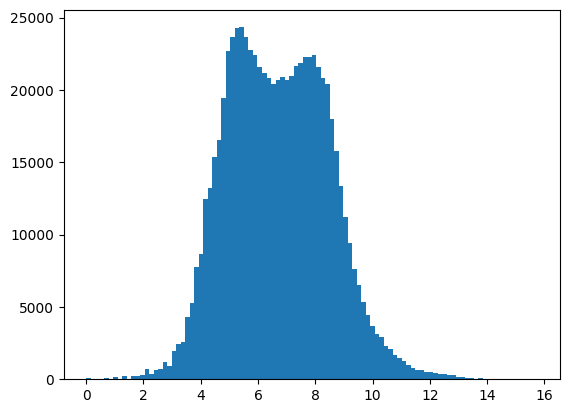

In [31]:
plt.hist(foll_intersect_lst_log, bins=100)

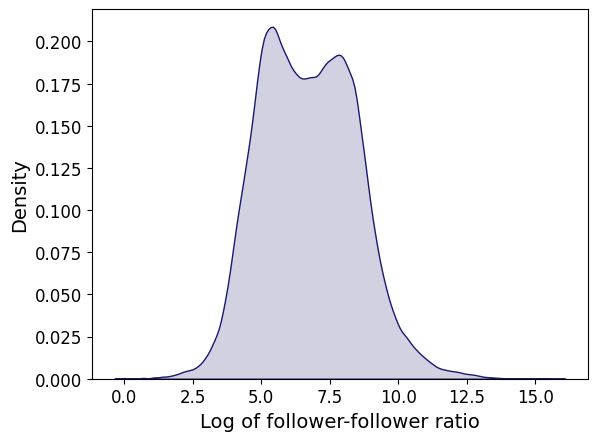

In [17]:
sns.kdeplot(foll_intersect_lst_log,fill=True, alpha=0.2,color="midnightblue")
# Set x-axis label with increased font size
plt.xlabel('Log of follower-follower ratio', fontsize=14)

# Set y-axis label with increased font size
plt.ylabel('Density', fontsize=14)

# Set tick labels font size
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Save the figure as a vectorized image (SVG format)
plt.savefig('Foll-foll_ratio_kde.svg',bbox_inches='tight', format='svg')

# Display the plot
plt.show()

In [52]:
with open(r'ExtractedData/data_pol_fol_intersection_wauthor_nobots.json', 'w') as fout:
    json.dump(follower_intersection_total_flat, fout)

In [2]:
# Opening JSON file
#f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\TwitterFollowerData\ExtractedData\Followers_secondpart.json')
file_name = r'ExtractedData/Followers_Extracted_data_20230612_NoBots.json'
 
# returns JSON object as 
# a dictionary
#secondpart_dict = json.load(f)
with open(file_name, 'r') as f:
    # ⛔️ json.decoder.JSONDecodeError: Extra data: line 2 column 3 (char 42)
    followers = json.load(f)
# Closing file
f.close()

In [22]:
# twitter author info
# Opening JSON file
f = open(r'ExtractedData/Twitter_authors_Thesis_Updated.json')
  
# returns JSON object as 
# a dictionary
data_authors = pd.read_json(f, dtype={"author_id_updated":str})
  
# Closing file
f.close()

In [7]:
# count number of followers without bots
# count number of followers for each follower across politicians
pol_follower_count_nobots = []
for item in followers:
    number_foll = len(item["ids_nobots"])
    pol_follower_count_nobots.append(number_foll)
    

In [9]:
print(pol_follower_count_nobots)

[3508, 3102434, 55753, 233543, 23398, 3056, 8107, 144131, 31135, 7576307, 32902, 13803, 354253, 88573, 23039, 857230, 4313, 19725, 4839, 3217, 6358, 47834, 33198, 21395, 43950, 88570, 5229, 32628, 43013, 33665, 27747, 103903, 2587, 107090, 105212, 114423, 35755, 999835, 72208, 27418, 152333, 22041, 4060666, 1284, 7257, 42042, 41000, 70680, 57842, 6779, 2704, 18720, 31027, 4454, 40099, 5327, 22601, 18520, 1167362, 122043, 167746, 177756, 52817, 121185, 143601, 8341, 18486, 265620, 5848, 18005, 32565, 70070, 18818211, 11300, 32814, 50862, 23911, 2075, 51927, 22691, 33979, 463574, 5536329, 1136416, 212680, 1177, 246227, 3957, 32260, 7733, 13477, 30405, 26660, 31403, 2264, 9636, 9089, 29564, 1012409, 14195916, 3866, 2103, 50883, 26571, 3830, 8346, 81739, 2846, 47424, 4394, 43617, 11331, 268140, 11494, 99471, 72292, 48767, 2170, 4077, 1950, 1539672, 4283, 85071, 2622, 7131, 14879, 1186, 3311, 51285, 7549, 196253, 446286, 117729, 19919, 90374, 819440, 156031, 595363, 4102, 32687, 23532, 1529

In [3]:
# list of each politician's follower follower count

neighborhood_follower_count_lst = []
for j in tqdm (range(len(followers)), desc="Loading..."):
    item = followers[j]  
    neighborhood_follower_count = {}
    neighborhood_follower_count["Politician_ID"] = item["politician_id"]
    neighborhood_follower_count["neighborhood_followers"] = item["followers"]
    neighborhood_follower_count_lst.append(neighborhood_follower_count)

Loading...: 100%|██████████| 859/859 [00:00<00:00, 622909.26it/s]


In [5]:
for item in neighborhood_follower_count_lst:
    item["sum_neighborhood_followers"] = sum(item["neighborhood_followers"])

In [8]:
print(neighborhood_follower_count_lst[1]["sum_neighborhood_followers"])

2508891710


In [9]:
with open(r'ExtractedData/neighborhood_follower_count_lst.json', 'w') as fout:
    json.dump(neighborhood_follower_count_lst, fout)

In [10]:
print(followers[0].keys())

dict_keys(['politician_id', 'ids', 'followers', 'following', 'ids_nobots'])


In [33]:
def extract_elements(list1, list2, list3, pol_lst):
    # Find the indices where elements overlap in both lists
    overlap_indices = set(range(len(list1))) & set(range(len(list2)))
    pol_lst_set = set(pol_lst)


    # Extract the elements from the list based on the overlap indices
    extracted_elements = [list3[i] for i in overlap_indices]
    non_overlap_indices = [i for i, item in enumerate(extracted_elements) if item not in pol_lst_set]
    
    print(len(extracted_elements)-len(non_overlap_indices))
    extracted_elements_2 = [extracted_elements[i] for i in non_overlap_indices]
    return extracted_elements_2


In [14]:
# list of each politician's follower follower count

neighborhood_follower_count_lst_2 = []
for j in tqdm (range(len(followers)), desc="Loading..."):
    item = followers[j]  
    followers_pol = item["followers"]
    ids = item["ids"]
    ids_nobots = item["ids_nobots"]
 
    follower_counts_nobots = extract_elements(ids, ids_nobots, followers_pol)
    neighborhood_follower_count = {}
    neighborhood_follower_count["Politician_ID"] = item["politician_id"]
    neighborhood_follower_count["neighborhood_followers"] = follower_counts_nobots
    neighborhood_follower_count_lst_2.append(neighborhood_follower_count)

Loading...: 100%|██████████| 859/859 [00:33<00:00, 25.70it/s] 


In [15]:
for item in neighborhood_follower_count_lst_2:
    item["sum_neighborhood_followers"] = sum(item["neighborhood_followers"])

In [16]:
print(neighborhood_follower_count_lst_2[1]["sum_neighborhood_followers"])

1816380959


In [17]:
with open(r'ExtractedData/neighborhood_follower_count_lst_2.json', 'w') as fout:
    json.dump(neighborhood_follower_count_lst_2, fout)

In [18]:
neighborhood_sum_lst = [item["sum_neighborhood_followers"] for item in neighborhood_follower_count_lst_2]

In [19]:
print(neighborhood_sum_lst)

[31037620, 1816380959, 258507093, 394257339, 173201169, 37665928, 50585459, 478156379, 204087198, 3635170463, 149318764, 126118489, 633825338, 238179057, 139883829, 1161819861, 24190769, 150585226, 23995885, 48895764, 82511182, 263735468, 197315069, 121445321, 216742917, 243454466, 36809919, 150371120, 176951159, 221463661, 140120556, 304907651, 22939645, 387982796, 369780892, 193519803, 170835263, 1198919337, 379748436, 109791581, 280213931, 124120524, 1909549774, 7472419, 87117521, 153936237, 239884003, 142170619, 190665111, 82947920, 13601600, 95783801, 192295617, 171851856, 181311356, 73375641, 83129187, 129709682, 629833817, 231286481, 235822204, 350102692, 295367983, 301211432, 287534453, 61157631, 108425626, 284029567, 52807394, 106580157, 180800253, 223892075, 9333105008, 106359570, 157443637, 245673808, 154162218, 28888228, 199240532, 175527204, 179999911, 396204377, 3315959349, 1368335529, 478111248, 11061185, 478512068, 65907210, 163765345, 35427482, 78744422, 221807792, 165

In [ ]:
# also remove politicians from the follower count

In [29]:
pol_id = data_authors.author_id_updated.values.tolist()
pol_id_int = [int(item) for item in pol_id]

In [34]:
neighborhood_follower_count_lst_2 = []
for j in tqdm (range(len(followers)), desc="Loading..."):
    item = followers[j]  
    followers_pol = item["followers"]
    ids = item["ids"]
    ids_nobots = item["ids_nobots"]
 
    follower_counts_nobots = extract_elements(ids, ids_nobots, followers_pol, pol_id_int)
    number_followers_nobots_nocm = len(follower_counts_nobots)
    neighborhood_follower_count = {}
    neighborhood_follower_count["Politician_ID"] = item["politician_id"]
    neighborhood_follower_count["neighborhood_followers"] = follower_counts_nobots
    neighborhood_follower_count["followers_count"] = number_followers_nobots_nocm
    neighborhood_follower_count_lst_2.append(neighborhood_follower_count)

Loading...:   0%|          | 0/859 [00:00<?, ?it/s]

0


Loading...:   0%|          | 2/859 [00:00<07:04,  2.02it/s]

0
0


Loading...:   1%|          | 8/859 [00:01<01:34,  9.04it/s]

0
0
0
0
0
0
0


Loading...:   2%|▏         | 13/859 [00:03<03:50,  3.67it/s]

0
0
0
0
0


Loading...:   4%|▎         | 32/859 [00:03<00:51, 16.20it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:   4%|▍         | 38/859 [00:04<00:51, 16.09it/s]

0
0
0
0


Loading...:   5%|▌         | 43/859 [00:05<01:29,  9.09it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:   7%|▋         | 59/859 [00:05<00:52, 15.25it/s]

0
0
0
0
0


Loading...:   8%|▊         | 68/859 [00:06<00:42, 18.55it/s]

0
0
0
0
0
0
0
0
0
0


Loading...:  10%|▉         | 82/859 [00:11<02:29,  5.21it/s]

0
0
0
0
0
0
0
0
0
0


Loading...:  10%|█         | 86/859 [00:13<03:19,  3.88it/s]

0
0
0
0
0
0
0
0
0
0


Loading...:  11%|█         | 94/859 [00:14<02:10,  5.88it/s]

0
0
0
0
0


Loading...:  12%|█▏        | 99/859 [00:14<01:49,  6.97it/s]

0
0


Loading...:  13%|█▎        | 113/859 [00:18<02:28,  5.02it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  14%|█▍        | 121/859 [00:19<01:54,  6.47it/s]

0
0
0
0
0
0
0
0
0
0
0


Loading...:  15%|█▌        | 132/859 [00:19<01:13,  9.85it/s]

0
0
0
0


Loading...:  16%|█▌        | 136/859 [00:19<01:09, 10.33it/s]

0
0


Loading...:  16%|█▋        | 140/859 [00:19<01:03, 11.31it/s]

0
0
0
0
0
0


Loading...:  17%|█▋        | 144/859 [00:20<01:07, 10.59it/s]

0
0
0
0
0
0
0


Loading...:  18%|█▊        | 153/859 [00:20<00:45, 15.45it/s]

0
0
0
0
0


Loading...:  19%|█▊        | 159/859 [00:20<00:41, 17.06it/s]

0
0
0
0
0
0
0
0


Loading...:  19%|█▉        | 164/859 [00:21<00:38, 18.13it/s]

0
0
0
0
0
0
0


Loading...:  20%|█▉        | 171/859 [00:21<00:53, 12.87it/s]

0
0
0
0


Loading...:  20%|██        | 174/859 [00:22<00:47, 14.54it/s]

0
0


Loading...:  21%|██        | 177/859 [00:22<01:22,  8.22it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  23%|██▎       | 195/859 [00:23<00:30, 21.82it/s]

0
0
0
0
0
0
0
0
0
0


Loading...:  23%|██▎       | 201/859 [00:23<00:42, 15.66it/s]

0
0
0
0
0
0
0
0
0
0
0


Loading...:  25%|██▍       | 212/859 [00:24<00:50, 12.87it/s]

0
0
0
0


Loading...:  27%|██▋       | 230/859 [00:27<00:54, 11.59it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  28%|██▊       | 244/859 [00:27<00:35, 17.50it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  29%|██▉       | 250/859 [00:27<00:34, 17.57it/s]

0
0
0


Loading...:  30%|██▉       | 255/859 [00:28<00:48, 12.52it/s]

0
0


Loading...:  30%|███       | 259/859 [00:28<00:47, 12.52it/s]

0
0
0
0
0
0


Loading...:  31%|███       | 268/859 [00:29<00:32, 18.06it/s]

0
0
0
0
0
0
0
0
0
0
0


Loading...:  32%|███▏      | 273/859 [00:29<00:28, 20.91it/s]

0
0
0
0
0
0
0
0


Loading...:  33%|███▎      | 281/859 [00:29<00:23, 24.10it/s]

0
0
0
0
0


Loading...:  35%|███▌      | 304/859 [00:30<00:17, 31.51it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  36%|███▌      | 310/859 [00:30<00:16, 33.51it/s]

0
0
0
0


Loading...:  37%|███▋      | 315/859 [00:30<00:20, 26.61it/s]

0
0
0
0
0
0
0
0
0


Loading...:  37%|███▋      | 320/859 [00:31<00:29, 18.43it/s]

0


Loading...:  40%|███▉      | 340/859 [00:31<00:15, 33.70it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  40%|████      | 347/859 [00:31<00:13, 36.79it/s]

0
0
0
0
0


Loading...:  41%|████      | 354/859 [00:32<00:18, 27.04it/s]

0
0
0
0
0
0
0


Loading...:  44%|████▍     | 378/859 [00:36<00:48,  9.93it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  45%|████▍     | 386/859 [00:38<00:57,  8.29it/s]

0
0
0
0
0
0
0
0
0
0
0


Loading...:  46%|████▌     | 395/859 [00:38<00:43, 10.56it/s]

0
0
0
0
0


Loading...:  47%|████▋     | 400/859 [00:38<00:40, 11.29it/s]

0
0
0
0
0
0
0
0
0
0


Loading...:  48%|████▊     | 410/859 [00:38<00:30, 14.85it/s]

0
0
0
0


Loading...:  50%|████▉     | 428/859 [00:39<00:22, 18.82it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  51%|█████▏    | 441/859 [00:40<00:17, 24.21it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  52%|█████▏    | 449/859 [00:40<00:13, 30.64it/s]

0
0
0
0
0
0


Loading...:  53%|█████▎    | 455/859 [00:40<00:17, 23.25it/s]

0
0
0
0
0
0
0
0
0
0
0


Loading...:  54%|█████▍    | 462/859 [00:40<00:16, 24.68it/s]

0
0
0
0


Loading...:  54%|█████▍    | 467/859 [00:41<00:21, 18.54it/s]

0
0
0
0
0


Loading...:  55%|█████▍    | 471/859 [00:42<00:39,  9.75it/s]

0
0


Loading...:  55%|█████▌    | 476/859 [00:42<00:36, 10.44it/s]

0
0
0
0
0


Loading...:  56%|█████▌    | 478/859 [00:44<01:12,  5.29it/s]

0
0
0


Loading...:  57%|█████▋    | 487/859 [00:44<00:34, 10.69it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  58%|█████▊    | 499/859 [00:44<00:20, 17.77it/s]

0
0
0
0
0
0
0


Loading...:  58%|█████▊    | 502/859 [00:45<00:30, 11.75it/s]

0
0
0
0
0


Loading...:  59%|█████▉    | 507/859 [00:45<00:27, 13.03it/s]

0
0


Loading...:  61%|██████    | 526/859 [00:46<00:12, 26.23it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  63%|██████▎   | 539/859 [00:46<00:08, 38.96it/s]

0
0
0
0
0
0
0
0
0


Loading...:  64%|██████▎   | 547/859 [00:46<00:09, 31.49it/s]

0
0
0
0
0
0
0
0


Loading...:  64%|██████▍   | 553/859 [00:47<00:11, 26.84it/s]

0
0
0
0
0
0
0
0
0


Loading...:  67%|██████▋   | 574/859 [00:47<00:10, 27.81it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  68%|██████▊   | 581/859 [00:48<00:10, 26.72it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  70%|███████   | 605/859 [00:48<00:05, 50.00it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  72%|███████▏  | 619/859 [00:48<00:03, 63.18it/s]

0


Loading...:  73%|███████▎  | 629/859 [00:49<00:05, 41.10it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  74%|███████▍  | 637/859 [00:49<00:06, 32.98it/s]

0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  75%|███████▌  | 647/859 [00:49<00:06, 34.61it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  77%|███████▋  | 661/859 [00:49<00:04, 40.56it/s]

0
0
0
0
0


Loading...:  79%|███████▊  | 676/859 [00:50<00:04, 42.58it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  79%|███████▉  | 682/859 [00:51<00:07, 23.49it/s]

0
0
0
0
0
0
0
0
0
0


Loading...:  80%|████████  | 689/859 [00:51<00:07, 23.01it/s]

0
0
0
0
0
0
0
0
0


Loading...:  83%|████████▎ | 717/859 [00:51<00:03, 38.55it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  84%|████████▍ | 725/859 [00:52<00:03, 39.68it/s]

0
0
0
0
0
0
0
0


Loading...:  86%|████████▋ | 742/859 [00:52<00:02, 43.98it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  88%|████████▊ | 754/859 [00:52<00:02, 48.11it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  90%|████████▉ | 772/859 [00:52<00:01, 59.68it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  92%|█████████▏| 786/859 [00:52<00:00, 75.95it/s]

0
0
0
0
0
0
0
0
0
0


Loading...:  93%|█████████▎| 803/859 [00:53<00:01, 36.44it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...:  97%|█████████▋| 833/859 [00:54<00:00, 69.45it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Loading...: 100%|██████████| 859/859 [00:54<00:00, 15.84it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0


In [35]:
for item in neighborhood_follower_count_lst_2:
    item["sum_neighborhood_followers"] = sum(item["neighborhood_followers"])

In [36]:
with open(r'ExtractedData/neighborhood_follower_count_lst_2.json', 'w') as fout:
    json.dump(neighborhood_follower_count_lst_2, fout)

In [37]:
neighborhood_sum_lst = [item["sum_neighborhood_followers"] for item in neighborhood_follower_count_lst_2]

In [40]:
outdegree_sum_lst = [len(item["neighborhood_followers"]) for item in neighborhood_follower_count_lst_2]

Estimate Follower (general public) political ideology

In [2]:
# twitter author info
# Opening JSON file
f = open(r'ExtractedData/Twitter_authors_Thesis_Updated.json')
  
# returns JSON object as 
# a dictionary
data_authors = pd.read_json(f)
  
# Closing file
f.close()

In [ ]:
# twitter author info
# Opening JSON file
f = open(r'ExtractedData/Followers_Extracted_data_20230612_NoBots.json')
  
# returns JSON object as 
# a dictionary
pol_followers = pd.read_json(f)
  
# Closing file
f.close()

In [ ]:
# twitter author info
# Opening JSON file
f = open(r'Final_Data_20230508.json')
  
# returns JSON object as 
# a dictionary
data = pd.read_json(f)
  
# Closing file
f.close()

In [ ]:
def get_unique_values(dictionary_list, key):
    unique_values = set()
    for dictionary in dictionary_list:
        if key in dictionary:
            unique_values.update(set(dictionary[key]))
    return list(unique_values)


unique_values = get_unique_values(list_of_dicts, selected_key)
print(unique_values)

In [ ]:
pol_followers["author_id_updated"] = pol_followers["politician_id"]

In [ ]:
data["author_id_updated"] = data["author_id_new"]

In [ ]:
data_unique = data.drop_duplicates(subset='author_id_updated')

In [ ]:
data_unique = data_unique[["author_id_updated", "Party"]]

In [ ]:
data_authors_merged = pd.merge(data_authors, data_unique, on='author_id_updated', how='left')

In [ ]:
data_authors_merged

In [ ]:
pol_followers_merged = pd.merge(pol_followers, data_authors_merged, on='author_id_updated', how='left')

In [ ]:
pol_followers_merged

,politician_id,ids,followers,following,ids_nobots,author_id_updated,author_id,author.username,author.name,author_id_strng,author_old,author_new,Party
0,586191770,"[3247847943, 1282681287510114304, 159770942238...","[77, 557, 76, 905, 18, 17, 2980, 3054, 179, 4,...","[1491, 1103, 70, 4076, 703, 624, 1252, 4931, 1...","[934587728, 363499879, 946542792, 1875774757, ...",586191770,586191770.0,standwithbarry,Barry Loudermilk,586191770.0,NaN,586191770.0,Republican
1,29501253,"[1646282960587436034, 1629848214647058432, 165...","[17, 78, 0, 3, 2, 0, 23, 10, 1, 0, 6, 16, 1, 3...","[236, 472, 35, 140, 105, 12, 154, 130, 124, 32...","[2255841979, 1259921523164487684, 942378499, 2...",29501253,29501253.0,RepAdamSchiff,Adam Schiff,29501253.0,NaN,29501253.0,Democrat
2,19926675,"[711411396123234304, 1651407711710347266, 5681...","[164, 2, 59505, 1015, 20, 31, 183, 0, 13, 88, ...","[1019, 94, 8855, 139, 749, 400, 734, 2506, 189...","[518644221, 362527551, 3096785216, 91460240717...",19926675,19926675.0,RepKevinBrady,Kevin Brady,19926675.0,NaN,19926675.0,Republican
3,38970940,"[1648262962560266240, 1649629315972079622, 161...","[5, 10, 24, 165, 107, 575, 9, 8, 4, 5, 5, 170,...","[101, 399, 439, 2577, 367, 1970, 154, 113, 16,...","[77218717, 426361581, 125429234, 1259921523164...",38970940,38970940.0,CharlieCrist,Charlie Crist,38970940.0,NaN,38970940.0,Democrat
4,23976316,"[1626741340154261505, 1361215982203764739, 163...","[68, 58, 38, 23, 4555, 21, 121, 8, 262, 115, 8...","[442, 2061, 1046, 342, 435, 721, 587, 77, 2118...","[105207162, 518644221, 879860930, 127764320248...",23976316,23976316.0,RepKenMarchant,Former Rep. Kenny Marchant,23976316.0,NaN,23976316.0,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,1346205046036377601,"[1654170719146635264, 1611092430375321601, 165...","[5, 48, 2, 1, 1225, 0, 0, 13977, 60, 60, 43, 4...","[192, 486, 403, 404, 606, 20, 5, 12864, 260, 5...","[56914738, 562988689, 19475925, 13343301590386...",1346205046036377601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,1340783304304410625,"[1656085601555300353, 1656094049047314432, 128...","[0, 3, 26, 945, 11, 259, 5, 195, 93, 1093, 209...","[181, 196, 1996, 3000, 160, 1295, 192, 1157, 4...","[518644221, 347454016, 1556529078055862273, 14...",1340783304304410625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,1187551973173796866,"[813652277147959300, 1650859762026942469, 1222...","[2435, 16, 220964, 545, 20, 125, 842, 29, 1143...","[2520, 418, 172635, 2166, 303, 115, 3141, 381,...","[4908376578, 50385128, 2338771976, 44478340, 8...",1187551973173796866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857,1128147829606600706,"[1369582219434594305, 1655009535680028672, 164...","[13980, 4, 25, 40, 68, 19, 2950, 1485, 220, 82...","[12864, 730, 186, 132, 975, 529, 5001, 328, 13...","[1287498883, 345570651, 2463384306, 26846746, ...",1128147829606600706,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Select the column with lists of values
selected_column = 'ids_nobots'

# Create an empty set to store unique values
unique_ids = set()

# Iterate through the selected column
for row in pol_followers_merged[selected_column]:
    unique_ids.update(set(row))

# Convert the set to a list
unique_ids_list = list(unique_ids)

In [15]:
print(len(unique_ids_list))

51268597


In [39]:
# Filter the dataframe based on 'col2' value
pol_followers_Dem = pol_followers_merged[pol_followers_merged['Party'] == 'Democrat']
pol_followers_Rep = pol_followers_merged[pol_followers_merged['Party'] == 'Republican']

# Create flat lists from 'col1' for filtered_df1
followers_of_Dems = [item for sublist in pol_followers_Dem['ids_nobots'].values for item in sublist]

# Create flat lists from 'col1' for filtered_df2
followers_of_Reps = [item for sublist in pol_followers_Rep['ids_nobots'].values for item in sublist]


In [22]:
followers_of_Dems= [int(item) for item in followers_of_Dems]
followers_of_Reps= [int(item) for item in followers_of_Reps]

In [25]:
unique_ids_list = [int(item) for item in unique_ids_list]

In [17]:
from collections import Counter

In [31]:
def count_occurrences_with_progress(list1, list2):
    result_counter = Counter()
    total_elements = len(list2)
    progress_interval = total_elements // 10  # Update progress every 10% of the total elements
    progress_count = 0

    for i, value in enumerate(list2):
        if value in list1:
            result_counter[value] += 1

        # Update progress
        if i >= progress_count * progress_interval:
            progress = int((i / total_elements) * 100)
            print(f"Progress: {progress}%")
            progress_count += 1

    return result_counter

In [32]:
followers_Dem_count= count_occurrences_with_progress(unique_ids_list, followers_of_Dems)

Progress: 0%


KeyboardInterrupt: 

In [ ]:
# Perform inner join and count occurrences
followers_Dem_count = Counter(x for x in followers_of_Dems if x in unique_ids_list)

In [43]:
# get number of Dem politicians the person follows

unique_ids_df = pd.DataFrame({'IDs': unique_ids_list })
followers_of_Dems_df = pd.DataFrame({'IDs': followers_of_Dems})

# Count occurrences of unique values in duplicates dataframe
result = followers_of_Dems_df['IDs'].value_counts().reset_index()
result.columns = ['IDs', 'Count']
result['Count'] = result['Count'].astype(int)
# Merge with unique values dataframe
result_Dems = pd.merge(unique_ids_df, result, on='IDs', how='left').fillna(0)



In [46]:
print(result_Dems.loc[3][:])

IDs      1366057894177890313
Count                    1.0
Name: 3, dtype: object


In [47]:
# get number of Rep politicians the person follows

followers_of_Reps_df = pd.DataFrame({'IDs': followers_of_Reps})

# Count occurrences of unique values in duplicates dataframe
result = followers_of_Reps_df['IDs'].value_counts().reset_index()
result.columns = ['IDs', 'Count']

# Merge with unique values dataframe
result_Reps = pd.merge(unique_ids_df, result, on='IDs', how='left').fillna(0)

In [64]:
print(result_Reps.loc[26][:])

IDs      1051270783
Count           4.0
Name: 26, dtype: object


In [66]:
result_Dems.to_csv("ABM_Files/users_followercount_Dem.csv")
result_Reps.to_csv("ABM_Files/users_followercount_Rep.csv")

In [67]:
result_Dems.rename(columns={'Count': 'Dem_Count'}, inplace=True)
result_Reps.rename(columns={'Count': 'Rep_Count'}, inplace=True)

In [69]:

# Perform inner join
result_both_Parties = pd.merge(result_Dems, result_Reps, on='IDs', how='inner')


In [72]:
print(len(result_both_Parties), len(result_Dems), len(result_Reps))

51268597 51268597 51268597


In [75]:
result_both_Parties["Count_both"] = result_both_Parties["Dem_Count"] + result_both_Parties["Rep_Count"]

In [86]:
print(result_both_Parties.loc[0][:])

IDs           1730314170
Dem_Count            0.0
Rep_Count            1.0
Count_both           1.0
Partisan           False
Name: 0, dtype: object


In [87]:
#result_both_Parties_filtered = result_both_Parties[result_both_Parties['Count_both'] > 10]
result_both_Parties['Partisan'] = np.where(result_both_Parties['Count_both'] >=10, True, False)
result_both_Parties["Count_diff"] = result_both_Parties["Dem_Count"] - result_both_Parties["Rep_Count"]

In [102]:
result_both_Parties.to_csv("ABM_Files/users_followercount_both_Parties.csv")

In [88]:
result_both_Parties_filtered = result_both_Parties[result_both_Parties['Count_both'] >= 10]

In [99]:
# 6% of general public are partisan
count_diff = result_both_Parties_filtered['Count_diff'].values.tolist()
count_diff = random.sample(count_diff, 100000)


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-194.    , -193.7545, -193.509 , ...,  296.509 ,  296.7545,
         297.    ]),
 <BarContainer object of 2000 artists>)

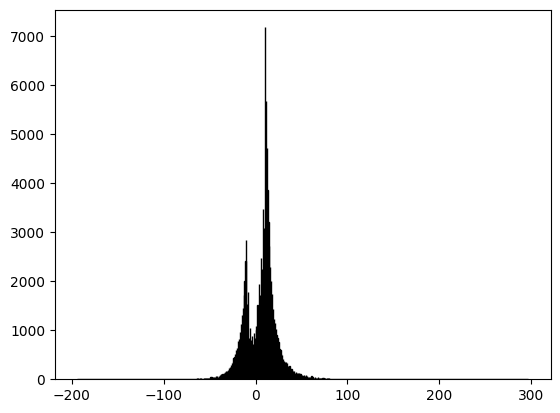

In [101]:
plt.hist(count_diff, bins=2000, edgecolor='black')

Now create df of my CMs which counts number or share of followers that are partisan, Dem and Rep

In [39]:
result_both_Parties = pd.read_csv("ABM_Files/users_followercount_both_Parties.csv")

In [ ]:
file_path = "ABM_Files/users_followercount_both_Parties.csv"
chunk_size = 1000000

# Initialize an empty list to store the chunked data
chunked_data = []

# Iterate over the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Process the chunk as needed
    # For example, you can perform computations, filtering, etc.
    # Here, we're just appending the chunk to the list
    chunked_data.append(chunk)

# Concatenate the list of chunks into a single DataFrame
df = pd.concat(chunked_data, ignore_index=True)

In [40]:
result_both_Parties.head(5)

,Unnamed: 0,IDs,Dem_Count,Rep_Count,Count_both,Partisan,Count_diff
0,0,1730314170,0.0,1.0,1.0,False,-1.0
1,1,748746589263392768,1.0,0.0,1.0,False,1.0
2,2,1646442391,2.0,0.0,2.0,False,2.0
3,3,1366057894177890313,1.0,0.0,1.0,False,1.0
4,4,3401183429,1.0,0.0,1.0,False,1.0


In [5]:
result_both_Parties["Democrat"] = (result_both_Parties["Dem_Count"] > result_both_Parties["Rep_Count"]) & ((result_both_Parties["Count_both"]) >= 10)
result_both_Parties["Republican"] = (result_both_Parties["Rep_Count"] > result_both_Parties["Dem_Count"]) & ((result_both_Parties["Count_both"]) >= 10)


In [28]:
# get list of followers (No Bots) for each politician
# twitter author info
# Opening JSON file
f = open(r'ExtractedData/Followers_Extracted_data_20230612_NoBots.json')
  
# returns JSON object as 
# a dictionary
pol_followers = pd.read_json(f)
  
# Closing file
f.close()

In [31]:
pol_followers_dict = pol_followers.to_dict(orient="records")

In [ ]:


# Create a set of unique IDs in the dataframe
df_ids = set(result_both_Parties["IDs"])

# Iterate over each dictionary in the list
for d in pol_followers_dict:
    # Initialize counts
    democrat_count = 0
    republican_count = 0

    # Iterate over each ID in the dictionary
    for id_ in d["ids_nobots"]:
        # Check if the ID exists in the dataframe IDs set
        if id_ in df_ids:
            # Increment counts based on the values in the "Democrat" and "Republican" columns
            democrat_count += df.loc[df["ID"] == id_, "Democrat"].sum()
            republican_count += df.loc[df["ID"] == id_, "Republican"].sum()

    # Add new key-value pairs to the dictionary
    d["DemocratCount"] = democrat_count
    d["RepublicanCount"] = republican_count

# Print the updated list of dictionaries
for d in dict_list:
    print(d)


In [7]:
from tqdm import tqdm
# Create a dictionary to map IDs to their respective counts
id_counts = result_both_Parties.groupby("IDs")[["Democrat", "Republican"]].sum().to_dict()



In [20]:
# Update the dictionaries in the list with a progress bar
for d in tqdm(pol_followers_dict, desc="Updating dictionaries"):
    ids_str = d["ids_nobots"]
    ids = [int(element) for element in ids_str]
    democrat_count = sum(id_counts["Democrat"].get(id_, 0) for id_ in ids)
    republican_count = sum(id_counts["Republican"].get(id_, 0) for id_ in ids)
    d["DemocratCount"] = democrat_count
    d["RepublicanCount"] = republican_count
    d["DemocratShare"] = democrat_count/len(ids)
    d["RepublicanShare"] = republican_count/len(ids)

Updating dictionaries: 100%|██████████| 859/859 [03:27<00:00,  4.15it/s]


In [21]:
pol_followers_df_full = pd.DataFrame(pol_followers_dict)

In [22]:
pol_followers_df_full = pol_followers_df_full[["politician_id", "DemocratCount", "RepublicanCount", "DemocratShare", "RepublicanShare"]]

In [58]:
pol_followers_df_full.dtypes

Unnamed: 0           int64
politician_id       object
DemocratCount        int64
RepublicanCount      int64
DemocratShare      float64
RepublicanShare    float64
dtype: object

In [24]:
pol_followers_df_full.to_csv("Politicians_Followers_Estimated_Partisanship.csv")

In [56]:
pol_followers_df_full = pd.read_csv("Politicians_Followers_Estimated_Partisanship.csv", dtype = {"politician_id": str})

Check normalized Politician follower count

In [3]:
result_both_Parties.head(5)

,Unnamed: 0,IDs,Dem_Count,Rep_Count,Count_both,Partisan,Count_diff
0,0,1730314170,0.0,1.0,1.0,False,-1.0
1,1,748746589263392768,1.0,0.0,1.0,False,1.0
2,2,1646442391,2.0,0.0,2.0,False,2.0
3,3,1366057894177890313,1.0,0.0,1.0,False,1.0
4,4,3401183429,1.0,0.0,1.0,False,1.0


In [41]:
result_both_Parties["Share_Dem"] = result_both_Parties["Dem_Count"] / result_both_Parties["Count_both"]
result_both_Parties["Share_Rep"] = result_both_Parties["Rep_Count"] / result_both_Parties["Count_both"]

In [42]:
result_both_Parties_Partisan = result_both_Parties[result_both_Parties["Partisan"] == True]

In [43]:
print(len(result_both_Parties), len(result_both_Parties_Partisan))

51268597 3719524


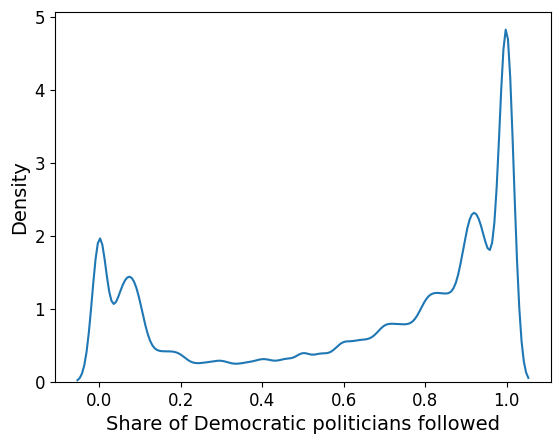

In [46]:
#result_both_Parties["Share_Dem"].hist()
sns.kdeplot(data=result_both_Parties_Partisan["Share_Dem"])
plt.xlabel("Share of Democratic politicians followed", fontsize=14)
plt.ylabel('Density', fontsize=14)
#plt.title('Kernel Density Plot of {}'.format("Share of Democrat Congress Members followed"))
#plt.xticks(np.arange(min(result_both_Parties_Partisan["Share_Dem"]), max(result_both_Parties_Partisan["Share_Dem"]), 0.1))



# Set tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Save the figure as a vectorized image (SVG format)
plt.savefig('Follower_Partisanship_kde.svg', format='svg')
# Display the plot
plt.show()



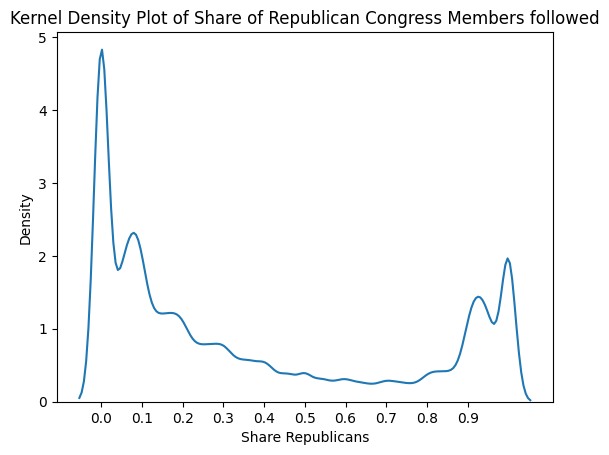

In [25]:
sns.kdeplot(data=result_both_Parties_Partisan["Share_Rep"])
plt.xlabel("Share Republicans")
plt.ylabel('Density')
plt.title('Kernel Density Plot of {}'.format("Share of Republican Congress Members followed"))
plt.xticks(np.arange(min(result_both_Parties_Partisan["Share_Rep"]), max(result_both_Parties_Partisan["Share_Rep"]), 0.1))
plt.show()

In [26]:
# assign dem and rep labels acc to threshold
result_both_Parties_Partisan["Democrat"] = (result_both_Parties_Partisan["Share_Dem"] > 0.85)
result_both_Parties_Partisan["Republican"] = (result_both_Parties_Partisan["Share_Rep"] > 0.85)


/scratch/slurm_tmpdir/job_22414206/ipykernel_274119/2488730264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_both_Parties_Partisan["Democrat"] = (result_both_Parties_Partisan["Share_Dem"] > 0.85)
/scratch/slurm_tmpdir/job_22414206/ipykernel_274119/2488730264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_both_Parties_Partisan["Republican"] = (result_both_Parties_Partisan["Share_Rep"] > 0.85)


In [27]:
result_both_Parties_Partisan

,Unnamed: 0,IDs,Dem_Count,Rep_Count,Count_both,Partisan,Count_diff,Share_Dem,Share_Rep,Democrat,Republican
6,6,2232375218,11.0,0.0,11.0,True,11.0,1.000000,0.000000,True,False
8,8,1409647376151633922,25.0,2.0,27.0,True,23.0,0.925926,0.074074,True,False
15,15,1318414381760335874,0.0,12.0,12.0,True,-12.0,0.000000,1.000000,False,True
26,26,1051270783,25.0,4.0,29.0,True,21.0,0.862069,0.137931,True,False
42,42,1243970408640061441,0.0,13.0,13.0,True,-13.0,0.000000,1.000000,False,True
...,...,...,...,...,...,...,...,...,...,...,...
51268520,51268520,14636129,13.0,0.0,13.0,True,13.0,1.000000,0.000000,True,False
51268552,51268552,2207878352,12.0,2.0,14.0,True,10.0,0.857143,0.142857,True,False
51268564,51268564,1241504911,1.0,9.0,10.0,True,-8.0,0.100000,0.900000,False,True
51268578,51268578,28672877,14.0,0.0,14.0,True,14.0,1.000000,0.000000,True,False


In [29]:
from tqdm import tqdm
# Create a dictionary to map IDs to their respective counts
id_counts = result_both_Parties_Partisan.groupby("IDs")[["Democrat", "Republican"]].sum().to_dict()

In [32]:
# Update the dictionaries in the list with a progress bar
for d in tqdm(pol_followers_dict, desc="Updating dictionaries"):
    ids_str = d["ids_nobots"]
    ids = [int(element) for element in ids_str]
    democrat_count = sum(id_counts["Democrat"].get(id_, 0) for id_ in ids)
    republican_count = sum(id_counts["Republican"].get(id_, 0) for id_ in ids)
    d["DemocratCount"] = democrat_count
    d["RepublicanCount"] = republican_count
    d["DemocratShare"] = democrat_count/len(ids)
    d["RepublicanShare"] = republican_count/len(ids)

Updating dictionaries: 100%|██████████| 859/859 [02:37<00:00,  5.44it/s]


In [33]:
pol_followers_df_full = pd.DataFrame(pol_followers_dict)

In [34]:
pol_followers_df_full = pol_followers_df_full[["politician_id", "DemocratCount", "RepublicanCount", "DemocratShare", "RepublicanShare"]]

In [55]:
pol_followers_df_full.dtypes

Unnamed: 0           int64
politician_id        int64
DemocratCount        int64
RepublicanCount      int64
DemocratShare      float64
RepublicanShare    float64
dtype: object

In [36]:
pol_followers_df_full.to_csv("Politicians_Followers_Estimated_Partisanship_20230710.csv")

In [ ]:
pol_followers_df_full["DemocratCount"]

In [60]:
data_authors = data_authors[["author_id_updated", "Party"]]

In [63]:
merged_df = pd.merge(pol_followers_df_full, data_authors, left_on='politician_id', right_on='author_id_updated', how='left')


In [61]:
pol_followers_df_full.dtypes


Unnamed: 0           int64
politician_id       object
DemocratCount        int64
RepublicanCount      int64
DemocratShare      float64
RepublicanShare    float64
dtype: object

In [64]:
print(len(merged_df), len(pol_followers_df_full))

859 859


In [66]:
#merged_df["SameParty_share"] = merged_df["DemocratShare"]["Party"] == "Democrat"
merged_df["SamePartyShare"] = np.where(merged_df["Party"] == 'Democrat', merged_df["DemocratShare"], merged_df["RepublicanShare"])
merged_df["OppPartyShare"] = np.where(merged_df["Party"] == 'Republican', merged_df["DemocratShare"], merged_df["RepublicanShare"])



In [67]:
merged_df

,Unnamed: 0,politician_id,DemocratCount,RepublicanCount,DemocratShare,RepublicanShare,author_id_updated,Party,SamePartyShare,OppPartyShare
0,0,586191770,325,2072,0.092645,0.590650,586191770,Republican,0.590650,0.092645
1,1,29501253,1497439,122869,0.482666,0.039604,29501253,Democrat,0.482666,0.039604
2,2,19926675,8347,36137,0.149714,0.648162,19926675,Republican,0.648162,0.149714
3,3,38970940,164847,8592,0.705853,0.036790,38970940,Democrat,0.705853,0.036790
4,4,23976316,4277,14857,0.182793,0.634969,23976316,Republican,0.634969,0.182793
...,...,...,...,...,...,...,...,...,...,...
854,854,1346205046036377601,3042,784,0.594954,0.153335,1346205046036377601,Democrat,0.594954,0.153335
855,855,1340783304304410625,2614,19435,0.095733,0.711774,1340783304304410625,Republican,0.711774,0.095733
856,856,1187551973173796866,501,4288,0.088972,0.761499,1187551973173796866,Republican,0.761499,0.088972
857,857,1128147829606600706,14253,200,0.787850,0.011055,1128147829606600706,Democrat,0.787850,0.011055


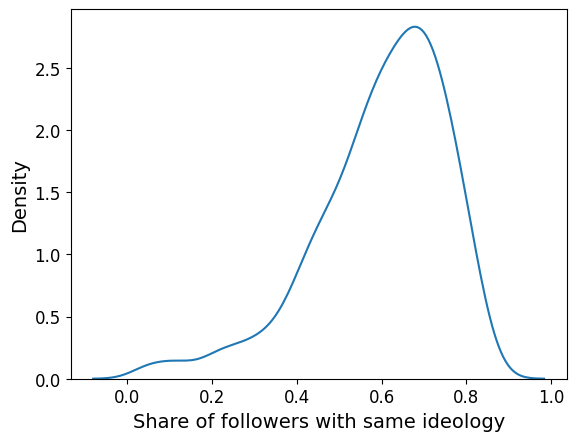

In [72]:
sns.kdeplot(merged_df["SamePartyShare"])
plt.xlabel('Share of followers with same ideology', fontsize=14)

# Set y-axis label with increased font size
plt.ylabel('Density', fontsize=14)

# Set tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.savefig('SamePartyFollowerShare_kde.svg', format='svg')
# Display the plot
plt.show()

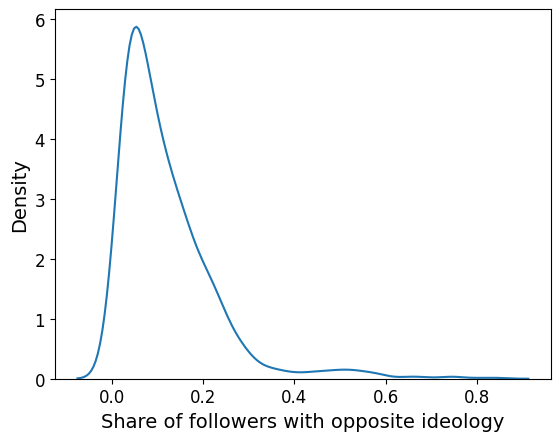

In [73]:
sns.kdeplot(merged_df["OppPartyShare"])
plt.xlabel('Share of followers with opposite ideology', fontsize=14)

# Set y-axis label with increased font size
plt.ylabel('Density', fontsize=14)

# Set tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.savefig('OppPartyFollowerShare_kde.svg', format='svg')
# Display the plot
plt.show()